# Exploratory Data Analysis (EDA) and Transformation/Training Pipelines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", sep=";")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


## 1. From the previous analyzis we can remove records with missing values in columns "Sex" and "Embarked":

In [4]:
data.drop(index = data[data.Sex == 'unknown'].index, inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

## 2. Separate target variable:

In [5]:
y = data['Survived']
X = data.drop(columns=['Survived'])

In [6]:
X.shape, y.shape

((884, 11), (884,))

## 3. Split dataset into training and testing sets (usually, it's split into training, validation, and testing sets, but today we will use the testing set as validation one):

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_val, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42) #AAAAAHHAHAHAH

In [8]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
450,451,2,West; Mr. Edwy Arthur,male,36.0,1,2,C.A. 34651,27.7500,NaN,S
151,152,1,Pears; Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S
240,241,3,Zabour; Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C
226,227,2,Mellors; Mr. William John,male,19.0,0,0,SW/PP 751,10.5000,NaN,S
367,368,3,Moussa; Mrs. (Mantoura Boulos),female,NaN,0,0,2626,7.2292,NaN,C


## 4. We also desided to drop columns "PassengerId", "Name", "Ticket", and "Cabin". Pipeline allows us to do this without changing the data frame.

In [9]:
from sklearn.compose import ColumnTransformer

In [10]:
transform1 = ColumnTransformer(transformers=[('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"])], remainder='passthrough')

In [11]:
transform1.fit_transform(X_train)

array([[2, 'male', 36.0, ..., 2, 27.75, 'S'],
       [1, 'female', 22.0, ..., 0, 66.6, 'S'],
       [3, 'female', nan, ..., 0, 14.4542, 'C'],
       ...,
       [1, 'male', 31.0, ..., 0, 50.4958, 'S'],
       [3, 'male', 20.0, ..., 0, 9.5, 'S'],
       [3, 'male', 38.0, ..., 0, 7.8958, 'S']], dtype=object)

In [12]:
transform1.get_feature_names_out()

array(['remainder__Pclass', 'remainder__Sex', 'remainder__Age',
       'remainder__SibSp', 'remainder__Parch', 'remainder__Fare',
       'remainder__Embarked'], dtype=object)

In [13]:
pd.DataFrame(transform1.transform(X_train), columns=transform1.get_feature_names_out()).head()

,remainder__Pclass,remainder__Sex,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare,remainder__Embarked
0,2,male,36.0,1,2,27.75,S
1,1,female,22.0,1,0,66.6,S
2,3,female,NaN,1,0,14.4542,C
3,2,male,19.0,0,0,10.5,S
4,3,female,NaN,0,0,7.2292,C


## 5. We also decided that "Sex" and "Embarked" are nominal features. We need to apply one-hot encoder to them.

In [14]:
from sklearn.preprocessing import OneHotEncoder
onee = OneHotEncoder(drop='first')

In [15]:
transform2 = ColumnTransformer(transformers=[('one-hot', onee, ["Sex", "Embarked"]), \
    ('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"])], remainder='passthrough')

In [16]:
transform2.fit_transform(X_train)

array([[ 1.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 27.75  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 66.6   ],
       [ 0.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 14.4542],
       ...,
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    , 50.4958],
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  9.5   ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.8958]])

In [17]:
transform2.get_feature_names_out()

array(['one-hot__Sex_male', 'one-hot__Embarked_Q', 'one-hot__Embarked_S',
       'remainder__Pclass', 'remainder__Age', 'remainder__SibSp',
       'remainder__Parch', 'remainder__Fare'], dtype=object)

In [18]:
pd.DataFrame(transform2.transform(X_train), columns=transform2.get_feature_names_out()).head()

,one-hot__Sex_male,one-hot__Embarked_Q,one-hot__Embarked_S,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,1.0,0.0,1.0,2.0,36.0,1.0,2.0,27.7500
1,0.0,0.0,1.0,1.0,22.0,1.0,0.0,66.6000
2,0.0,0.0,0.0,3.0,NaN,1.0,0.0,14.4542
3,1.0,0.0,1.0,2.0,19.0,0.0,0.0,10.5000
4,0.0,0.0,0.0,3.0,NaN,0.0,0.0,7.2292


## 6. We want to populate the colum "Age" with the average values. It's important that the mean is calculated over the train data only!

In [19]:
from sklearn.impute import SimpleImputer

In [21]:
imp = SimpleImputer(strategy='median')

In [22]:
transform3 = ColumnTransformer(transformers=[('one-hot', onee, ["Sex", "Embarked"]), ('imputer', imp, ['Age']), \
    ('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"])], remainder='passthrough')

In [23]:
transform3.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked']),
                                ('imputer', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('drop_colums', 'drop',
                                 ['PassengerId', 'Name', 'Ticket', 'Cabin'])])

In [24]:
transform3.get_feature_names_out()

array(['one-hot__Sex_male', 'one-hot__Embarked_Q', 'one-hot__Embarked_S',
       'imputer__Age', 'remainder__Pclass', 'remainder__SibSp',
       'remainder__Parch', 'remainder__Fare'], dtype=object)

In [25]:
pd.DataFrame(transform3.transform(X_train), columns=transform3.get_feature_names_out()).head()

,one-hot__Sex_male,one-hot__Embarked_Q,one-hot__Embarked_S,imputer__Age,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__Fare
0,1.0,0.0,1.0,36.0,2.0,1.0,2.0,27.7500
1,0.0,0.0,1.0,22.0,1.0,1.0,0.0,66.6000
2,0.0,0.0,0.0,28.5,3.0,1.0,0.0,14.4542
3,1.0,0.0,1.0,19.0,2.0,0.0,0.0,10.5000
4,0.0,0.0,0.0,28.5,3.0,0.0,0.0,7.2292


## Now, we can train any model on our data:

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
X_train_transformed = transform3.fit_transform(X_train)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
neigh.score(transform3.transform(X_test), y_test)

0.6712328767123288

In [30]:
X_test_transformed = transform3.transform(X_test)
y_pred = neigh.predict(X_test_transformed)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, y_pred)

0.6712328767123288

## Pipeline

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
pipe1 = Pipeline([('transform', transform3), ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [35]:
pipe1.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age']),
                                                 ('drop_colums', 'drop',
                                                  ['PassengerId', 'Name',
                                                   'Ticket', 'Cabin'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [36]:
pipe1.score(X_test, y_test)

0.6712328767123288

In [37]:
y_pred = pipe1.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.6712328767123288

## 7. Finally, let's analyze column "Fare"

<Axes: xlabel='Fare', ylabel='Count'>

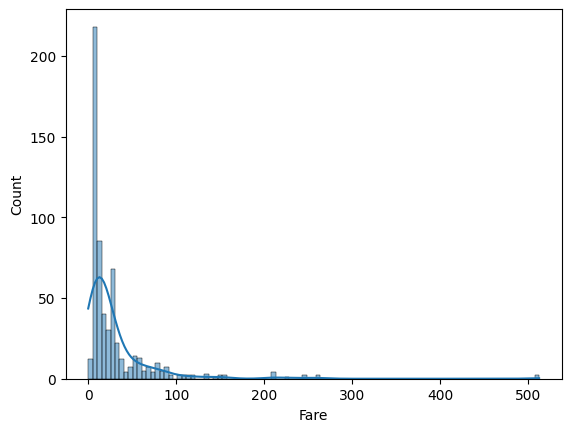

In [39]:
sns.histplot(X_train.Fare, kde=True) #stat='frequency'

In [41]:
data_transformed = pd.DataFrame(transform3.transform(X_train), columns=transform3.get_feature_names_out()).join(y_train)

<Axes: >

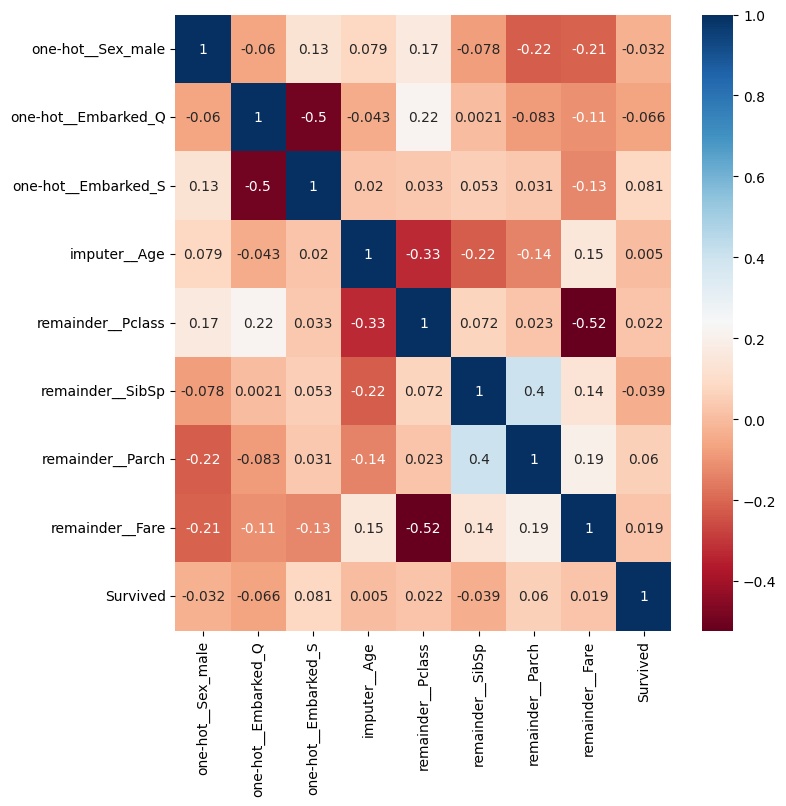

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(data_transformed.corr(), cmap="RdBu", annot=True)

## Binarization

In [46]:
#pd.cut(data_transformed['imputer__Age'], bins=[5, 20, 45, 80])
pd.qcut(data_transformed['imputer__Age'], q=5, duplicates='drop') #labels=False

,imputer__Age
0,"(28.5, 38.0]"
1,"(21.0, 28.5]"
2,"(21.0, 28.5]"
3,"(0.419, 21.0]"
4,"(21.0, 28.5]"
...,...
587,"(21.0, 28.5]"
588,"(38.0, 80.0]"
589,"(28.5, 38.0]"
590,"(0.419, 21.0]"


In [47]:
# from sklearn.base import BaseEstimator, TransformerMixin
# class BinarizeAge(BaseEstimator, TransformerMixin):
#     def __init__(self, num_bins):
#         self.num_bins = num_bins

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y=None):
#         X['Age'] = pd.qcut(X['Age'], self.num_bins, labels=False)
#         return X
from sklearn.preprocessing import KBinsDiscretizer

In [50]:
age_transformer = Pipeline(steps=[('imputer', imp), ('fare_binarize', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'))])

In [51]:
age_transformer.fit_transform(X_train[['Age']])

array([[2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [3.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [4.],
       [2.],
       [1.],
       [1.],
       [2.],
       [3.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],

In [52]:
transform4 = ColumnTransformer(transformers=[('one-hot', onee, ["Sex", "Embarked"]),
    ('imputer+bins', age_transformer, ['Age']),
    ('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"])],
    #('age_binarize', BinarizeAge(5), ['Age'])], remainder='passthrough')
    #('fare_binarize', KBinsDiscretizer(n_bins=12, encode='ordinal'), ['Fare'])],
    remainder='passthrough')

In [53]:
transform4.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked']),
                                ('imputer+bins',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('fare_binarize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'))]),
                                 ['Age']),
                                ('drop_colums', 'drop',
                                 ['PassengerId', 'Name', 'Ticket', 'Cabin'])])

In [54]:
data_transformed = pd.DataFrame(transform4.transform(X_train), columns=transform4.get_feature_names_out()).join(y_train)

<Axes: >

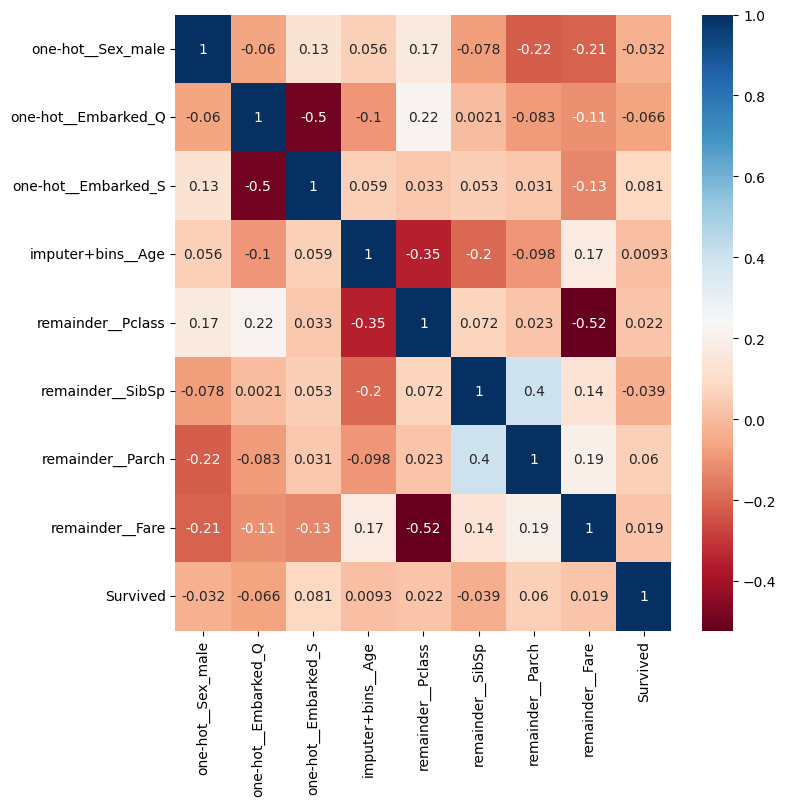

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(data_transformed.corr(), cmap="RdBu", annot=True)

In [56]:
transform5 = ColumnTransformer(transformers=[('one-hot', onee, ["Sex", "Embarked"]),
    ('imputer+bins', age_transformer, ['Age']),
    ('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"]),
    #('age_binarize', BinarizeAge(5), ['Age'])], remainder='passthrough')
    ('fare_binarize', KBinsDiscretizer(n_bins=12, encode='ordinal'), ['Fare'])],
    remainder='passthrough')

In [57]:
transform5.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked']),
                                ('imputer+bins',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('fare_binarize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'))]),
                                 ['Age']),
                                ('drop_colums', 'drop',
                                 ['PassengerId', 'Name', 'Ticket', 'Cabin']),
                                ('fare_binarize',
                                 KBinsDiscretizer(encode='ordinal', n_bins=12),
                                 ['Fare'])])

In [58]:
pipe2 = Pipeline([('transform', transform5), ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [59]:
pipe2.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('imputer+bins',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('fare_binarize',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['Age']),
                                                 ('drop_colums', 'drop',
                                                  ['PassengerId', 'Name',
                                                   'Ticket', 'Cabin']),
                                                 ('fare_binarize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=12),
                                                  ['Fare'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [60]:
y_pred = pipe2.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.7808219178082192

In [62]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(transform5.transform(X_train), y_train)

array([0.17835732, 0.        , 0.00231869, 0.06253312, 0.08449766,
       0.0714943 , 0.00443013, 0.04953174])

In [63]:
transform5.get_feature_names_out()

array(['one-hot__Sex_male', 'one-hot__Embarked_Q', 'one-hot__Embarked_S',
       'imputer+bins__Age', 'fare_binarize__Fare', 'remainder__Pclass',
       'remainder__SibSp', 'remainder__Parch'], dtype=object)

In [64]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
450,451,2,West; Mr. Edwy Arthur,male,36.0,1,2,C.A. 34651,27.7500,NaN,S
151,152,1,Pears; Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S
240,241,3,Zabour; Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C
226,227,2,Mellors; Mr. William John,male,19.0,0,0,SW/PP 751,10.5000,NaN,S
367,368,3,Moussa; Mrs. (Mantoura Boulos),female,NaN,0,0,2626,7.2292,NaN,C


## 8. Scaling of the features
[MinMax](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
$$
\tilde{x} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

[Standard](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
$$
\tilde{x} = \frac{x-\mu}{\sigma}
$$

Scaling is like we are attaching weights to each feature !!!! 🔥 🔥 🔥

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [68]:
sc = StandardScaler()

In [70]:
transform6 = ColumnTransformer(transformers=[('one-hot', onee, ["Sex", "Embarked"]),
    ('imputer+bins', age_transformer, ['Age']),
    ('drop_colums', 'drop', ["PassengerId", "Name", "Ticket", "Cabin"]),
    ('fare_binarize', KBinsDiscretizer(n_bins=12, encode='ordinal'), ['Fare'])],
    remainder='passthrough')

In [71]:
transform6.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked']),
                                ('imputer+bins',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('fare_binarize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'))]),
                                 ['Age']),
                                ('drop_colums', 'drop',
                                 ['PassengerId', 'Name', 'Ticket', 'Cabin']),
                                ('fare_binarize',
                                 KBinsDiscretizer(encode='ordinal', n_bins=12),
                                 ['Fare'])])

In [72]:
pipe3 = Pipeline([('transform', transform6), ('scaler', sc), ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [73]:
pipe3.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('imputer+bins',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('fare_binarize',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['Age']),
                                                 ('drop_colums', 'drop',
                                                  ['PassengerId', 'Name',
                                                   'Ticket', 'Cabin']),
                                                 ('fare_binarize',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=12),
                                                  ['Fare'])])),
                ('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [74]:
y_pred = pipe3.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.797945205479452

## 9. Pairwise Plot

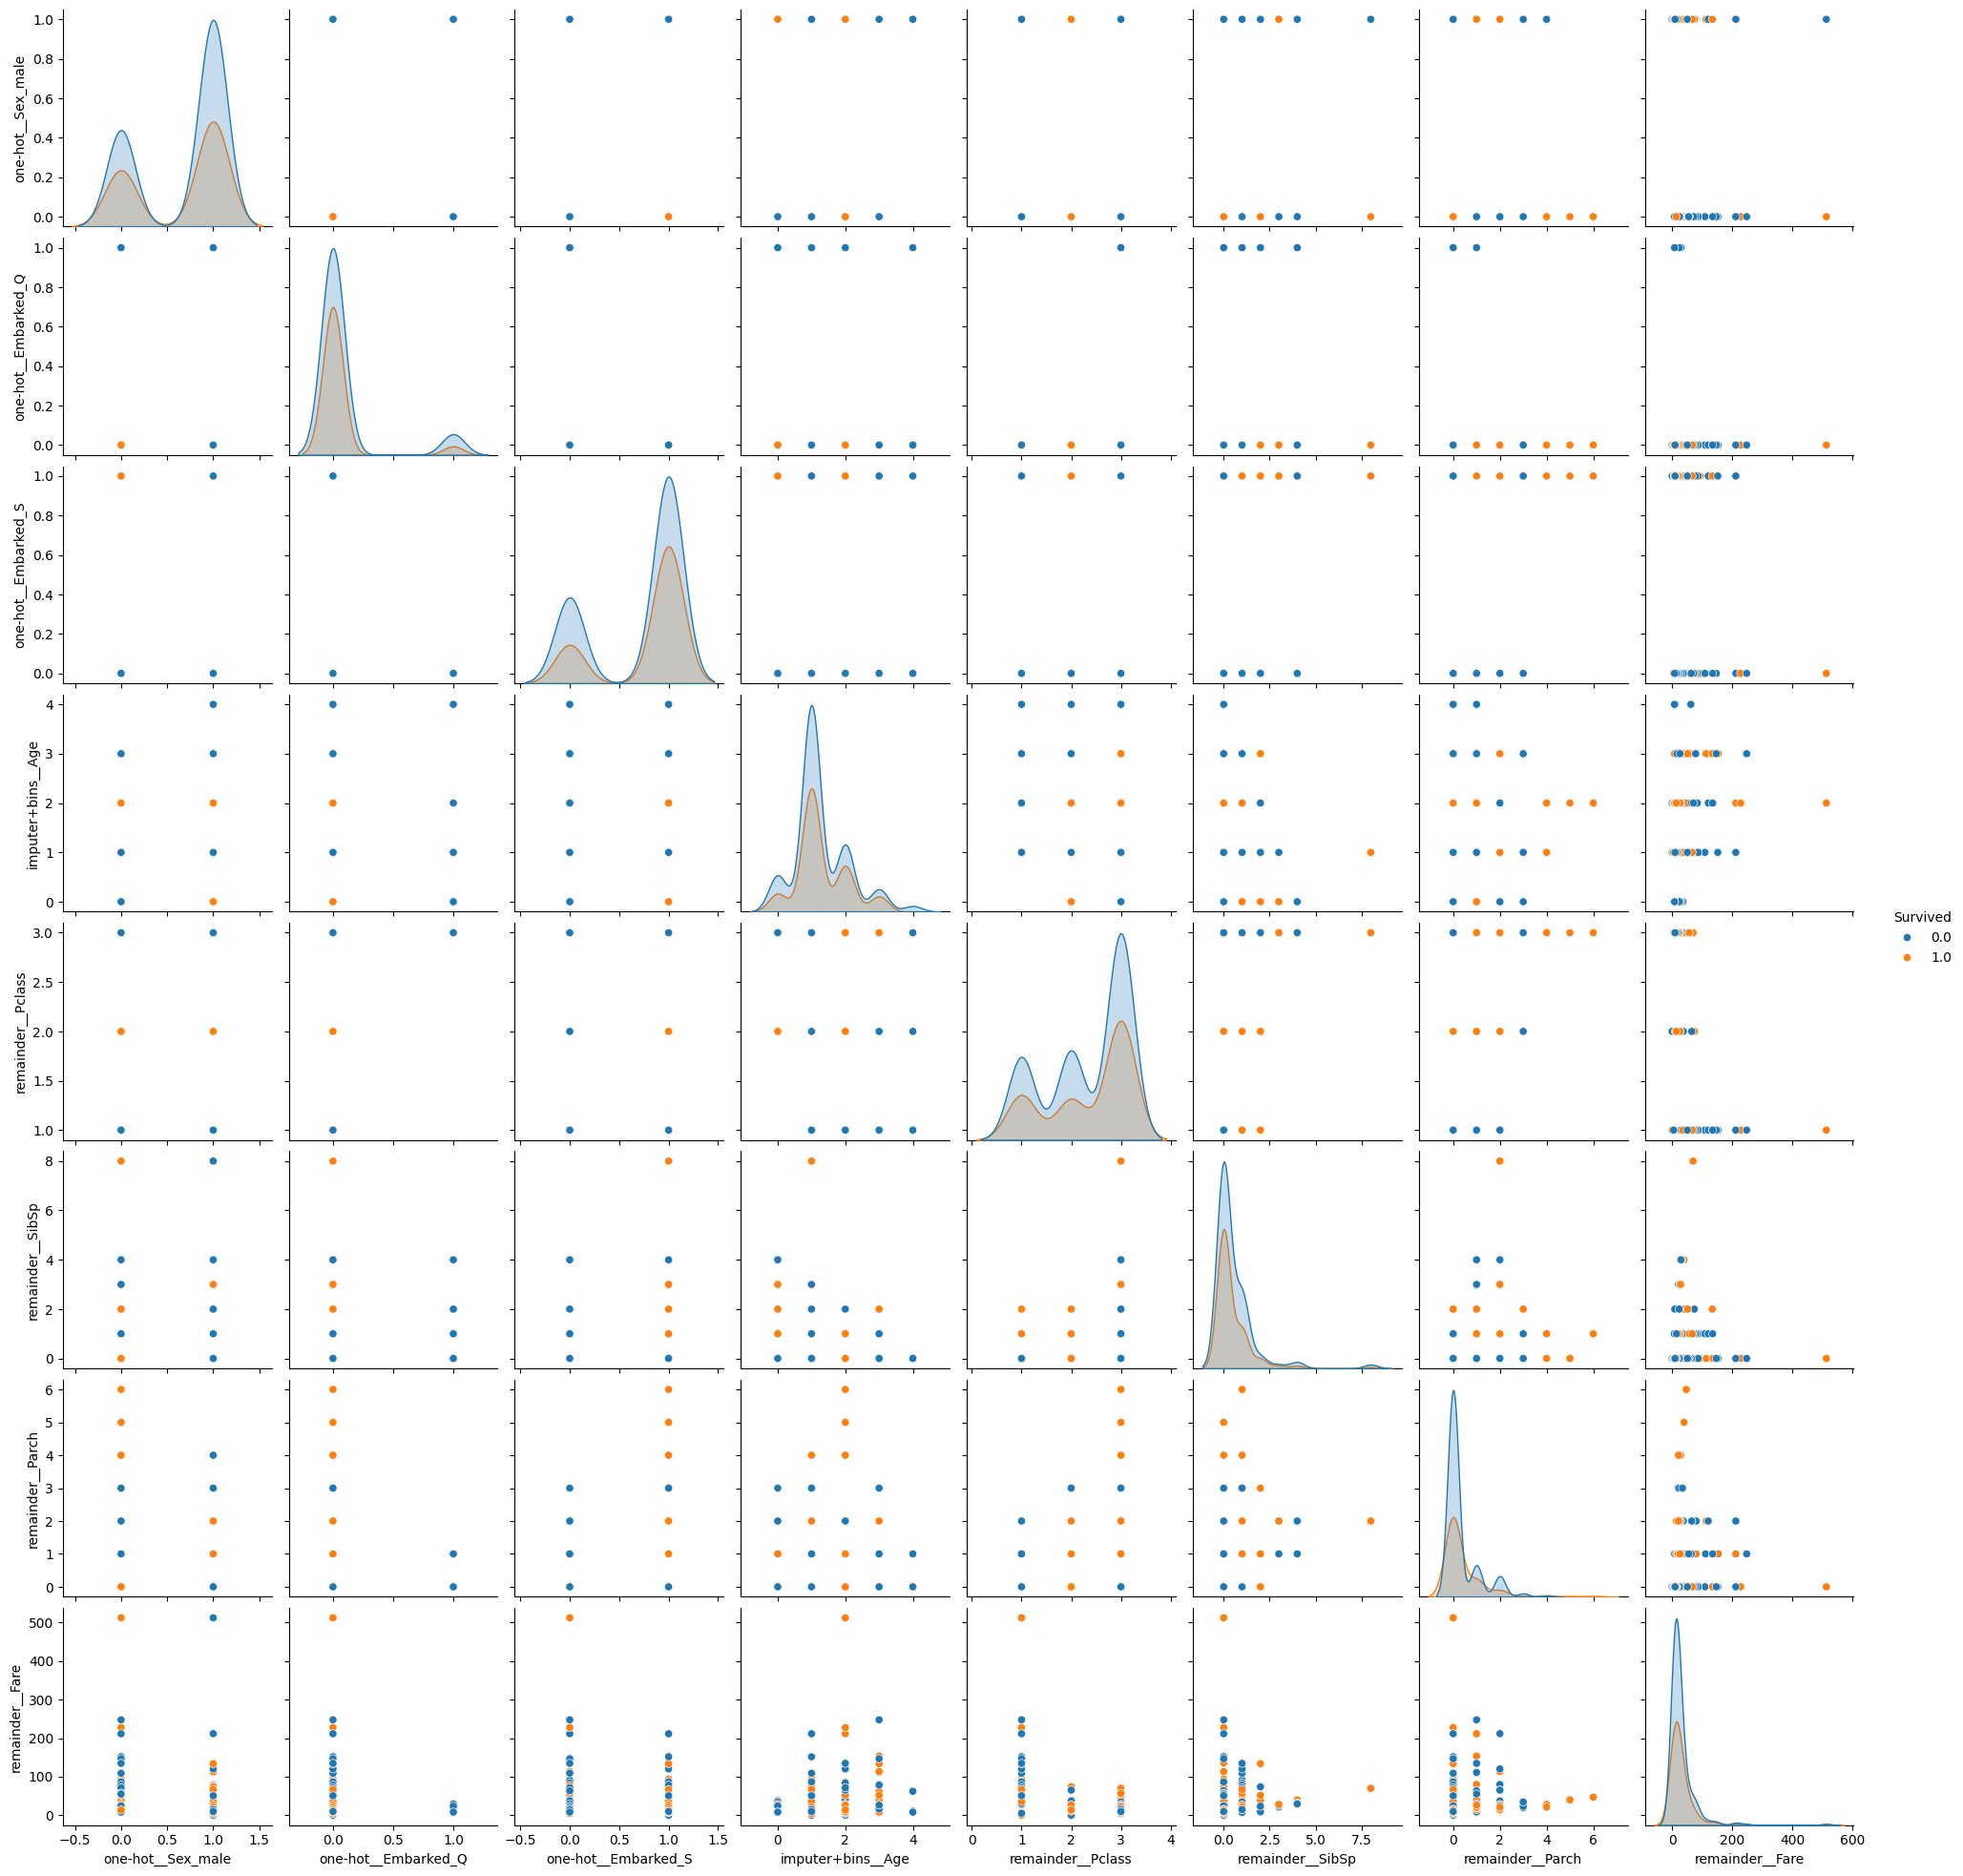

In [76]:
sns.pairplot(data_transformed, hue='Survived')